In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Reading the dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


To delete the row

In [5]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


To display stats about data

In [7]:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# to get basic info about the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to display number of samples on each class

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

PREPROCESSING THE DATA  SET

# Check for Null Values
- While training the model we need to remove all the null values
- The following code will execute sum of null values for the corresponding columns

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis: Display basic graphs

<AxesSubplot:>

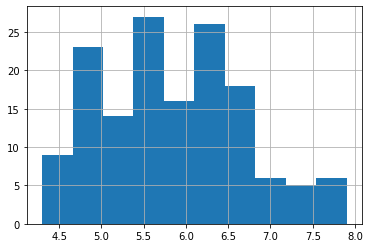

In [17]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

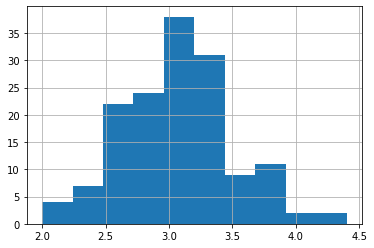

In [18]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

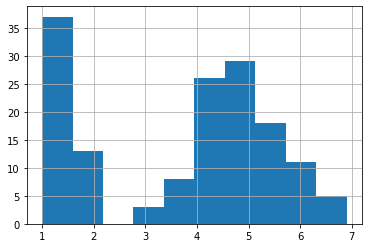

In [19]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

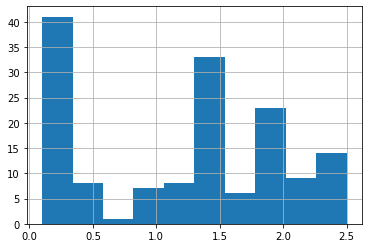

In [20]:
df['PetalWidthCm'].hist()

In [21]:
# Scatter Plot

In [22]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

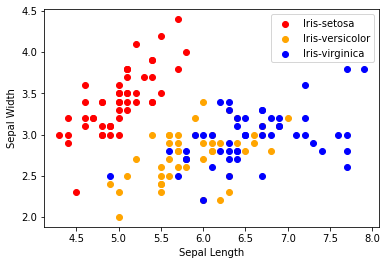

In [26]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

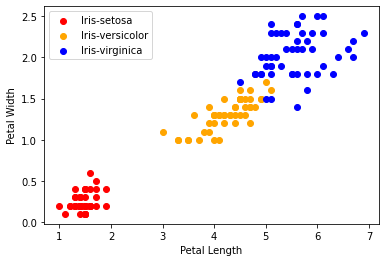

In [30]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. 
Each cell in the table shows the correlation between two variables. The value is in the range
of -1 to 1. If two variables have high correlation, we can neglect one variable from those two. 

In [32]:
    df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

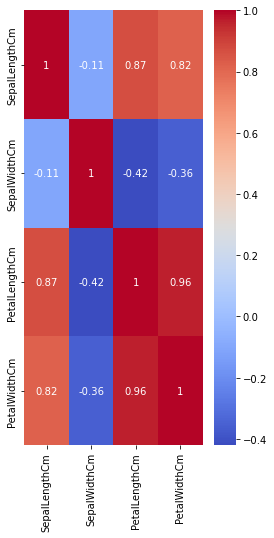

In [41]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (4,8))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

Label Encoder

In ML, we usually deal with datasets which contains multiple lables in one or more than one 
columns. These labels can be in the form of words or numbers. Label encoding refers to converting the 
lables into numeric form so as to convert it into the MR form.
    

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()